In [1]:
import pandas as pd
from params import *
from data import *
import pickle
from models import *
import os
from torch import nn
from torch.optim import Adam
from train import Trainer
from eval import *
from metrics import *
from sklearn.manifold import TSNE
from encoding import *
from transformers import AutoTokenizer

d:\conda\envs\torch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pth = 'data/big_data/kinetics400_5per/train/'
pth_to_save_images = 'data/big_data/kinetics400_5per/devided/images/'
pth_to_save_audio = 'data/big_data/kinetics400_5per/devided/audios/'

In [3]:
d = {
    "Text" : [],
    "Image" : [],
    "Audio" : []
}
for class_name in os.listdir(pth_to_save_images):
    for img_pth, audio_pth in zip(os.listdir(pth_to_save_images + class_name), os.listdir(pth_to_save_audio + class_name)):
        d['Text'].append(class_name)
        d['Image'].append(pth_to_save_images + class_name + '/' + img_pth)
        d['Audio'].append(pth_to_save_audio + class_name + '/' + audio_pth)
df = pd.DataFrame.from_dict(d)

In [4]:
df.head()

,Text,Image,Audio
0,abseiling,data/big_data/kinetics400_5per/devided/images/...,data/big_data/kinetics400_5per/devided/audios/...
1,abseiling,data/big_data/kinetics400_5per/devided/images/...,data/big_data/kinetics400_5per/devided/audios/...
2,abseiling,data/big_data/kinetics400_5per/devided/images/...,data/big_data/kinetics400_5per/devided/audios/...
3,abseiling,data/big_data/kinetics400_5per/devided/images/...,data/big_data/kinetics400_5per/devided/audios/...
4,abseiling,data/big_data/kinetics400_5per/devided/images/...,data/big_data/kinetics400_5per/devided/audios/...


In [5]:
len(df)

10783

In [6]:
ip = df[['Image', 'Text']]
ap = df[['Audio', 'Text']]

In [7]:
ip = ip.rename({
    'Text': OBJECT2_COLUMN_NAME,
    'Image': OBJECT1_COLUMN_NAME,
}, axis=1)
ip[TYPE1_COLUMN_NAME] = TYPE_IMAGE
ip[TYPE2_COLUMN_NAME] = TYPE_TEXT

ip.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
1,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
2,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
3,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
4,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text


In [8]:
ap = ap.rename({
    'Text': OBJECT2_COLUMN_NAME,
    'Audio': OBJECT1_COLUMN_NAME,
}, axis=1)
ap[TYPE1_COLUMN_NAME] = TYPE_IMAGE
ap[TYPE2_COLUMN_NAME] = TYPE_TEXT

ap.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/audios/...,abseiling,img,text
1,data/big_data/kinetics400_5per/devided/audios/...,abseiling,img,text
2,data/big_data/kinetics400_5per/devided/audios/...,abseiling,img,text
3,data/big_data/kinetics400_5per/devided/audios/...,abseiling,img,text
4,data/big_data/kinetics400_5per/devided/audios/...,abseiling,img,text


In [9]:
tdf = pd.concat([ip, ap], axis=0)
tdf.head()

,object1,object2,type1,type2
0,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
1,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
2,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
3,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text
4,data/big_data/kinetics400_5per/devided/images/...,abseiling,img,text


In [10]:
initial = InitialDataset(tdf)

In [11]:
tdf = initial.return_id_df()

In [12]:
p1 = tdf.iloc[:len(ip)]
p2 = tdf.iloc[len(ip):]

In [13]:
p1['gid3'] = p2['gid1']

C:\Users\ddimo\AppData\Local\Temp\ipykernel_20508\37219870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1['gid3'] = p2['gid1']


In [14]:
p1.head()

,gid1,gid2,gid3
0,0,21566,10783
1,1,21567,10784
2,2,21568,10785
3,3,21569,10786
4,4,21570,10787


In [15]:
for i in p1.iloc[1000].values:
    print(initial.get_object_by_global_id(i).content)

data/big_data/kinetics400_5per/devided/images/brushing hair/odqCV7uHIXk.jpg
brushing hair
data/big_data/kinetics400_5per/devided/audios/brushing hair/odqCV7uHIXk.wav


In [16]:
p1 = p1.rename({
    'gid1': 'Images',
    'gid2': 'Text',
    'gid3': 'Audio'
}, axis=1)

In [17]:
p1.head()

,Images,Text,Audio
0,0,21566,10783
1,1,21567,10784
2,2,21568,10785
3,3,21569,10786
4,4,21570,10787


In [18]:
# id_text = TextEncoder().encode_dict(initial.return_texts())

# with open('data\\big_data\\kinetics400_5per\\experimental_text.pickle', 'wb') as f:
#     pickle.dump(id_text, f)

with open('data\\big_data\\kinetics400_5per\\experimental_text.pickle', 'rb') as f:
    id_text = pickle.load(f)

anker_dataset = Anker_Dataset(
    ids=p1['Text'].values,
    id_text=id_text
)

In [19]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

text_dataset = Text_Dataset(
    ids=p1['Text'].values,
    initial=initial,
    tokenizer=tokenizer,
    max_length=10,
)

In [20]:
image_dataset = Image_Dataset(
    ids=p1['Images'].values,
    initial=initial
)

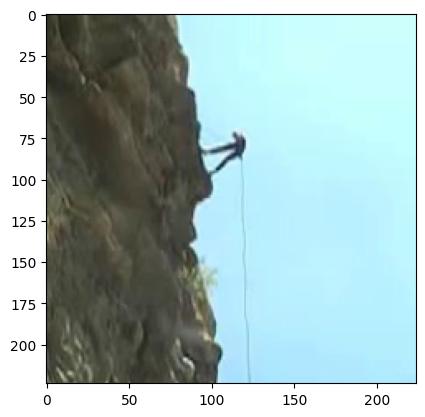

In [21]:
p = image_dataset[0].permute((1,2,0))
p -= p.min()
p /= p.max()
plt.imshow(p)
plt.show()

In [22]:
audio_dataset = Audio_Dataset(
    ids=p1['Audio'].values,
    initial=initial
)

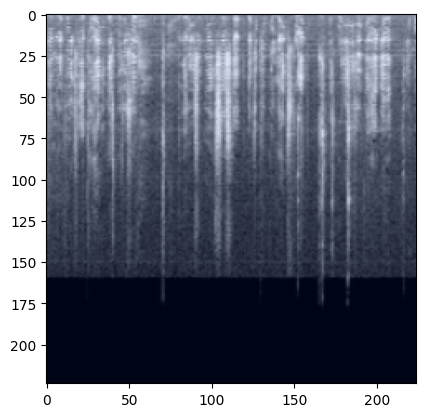

In [23]:
p = audio_dataset[0].permute((1,2,0))
p -= p.min()
p /= p.max()
plt.imshow(p)
plt.show()

In [24]:
ds = Orkester(
    anker_ds=anker_dataset,
    tds=text_dataset,
    ids=image_dataset,
    ads=audio_dataset
)

In [25]:
dl = DataLoader(ds, batch_size=8, shuffle=True, pin_memory=True, num_workers=6)

In [ ]:
epochs = 1

text_model = TextModel(tokenizer.vocab_size).to(DEVICE)
image_model = MultiScaleCNN().to(DEVICE)
audio_model = MultiScaleCNN().to(DEVICE)

text_optim = Adam(text_model.parameters())
image_optim = Adam(image_model.parameters())
audio_optim = Adam(audio_model.parameters())

In [ ]:
for e in range(epochs):
    ttl = 0
    mode = 'anker'
    for anker, t, i, a in dl:

        text_optim.zero_grad()
        image_optim.zero_grad()
        audio_optim.zero_grad()

        anker = anker.to(DEVICE)
        t = t.to(DEVICE)
        i = i.to(DEVICE)
        a = a.to(DEVICE)

        pred_text = text_model(t)
        pred_image = image_model(i)
        pred_audio = audio_model(a)

        y = anker if mode == 'anker' else torch.stack([pred_text, pred_image, pred_audio]).median(dim=0)

        text_loss = combined_loss(y, pred_text)
        image_loss = combined_loss(y, pred_image)
        audio_loss = combined_loss(y, pred_audio)

        print(text_loss.item(), image_loss.item(), audio_loss.item(), torch.tensor([text_loss.item(), image_loss.item(), audio_loss.item()]).mean())
        if text_loss.item() < 0.1:
            model = 'median'
            
        text_loss.backward()
        image_loss.backward()
        audio_loss.backward()

        text_optim.step()
        image_optim.step()
        audio_optim.step()

        
        # alpha = max(0, alpha - 0.05)
    
    print(f'Epoch {e + 1}. Loss = {ttl / dl.batch_size}')

1.2042551040649414 1.1908643245697021 1.2364389896392822 tensor(1.2105)
0.8074741959571838 1.0148210525512695 1.0241296291351318 tensor(0.9488)
0.6116324663162231 0.8757995963096619 0.8553646206855774 tensor(0.7809)
0.5091525316238403 0.7536380290985107 0.716080904006958 tensor(0.6596)
0.4713008403778076 0.6629237532615662 0.6444319486618042 tensor(0.5929)
0.4447149634361267 0.5922200679779053 0.5523714423179626 tensor(0.5298)
0.43189752101898193 0.5572561621665955 0.5125696659088135 tensor(0.5006)
0.4356803894042969 0.48683202266693115 0.4817872643470764 tensor(0.4681)
0.43603137135505676 0.4816182255744934 0.4599634110927582 tensor(0.4592)
0.42697227001190186 0.46053990721702576 0.4368326663970947 tensor(0.4414)
0.4157101809978485 0.446004182100296 0.4132767915725708 tensor(0.4250)
0.3990139663219452 0.4097699522972107 0.411319375038147 tensor(0.4067)
0.41460829973220825 0.42811906337738037 0.39612579345703125 tensor(0.4130)
0.4051535129547119 0.4071994423866272 0.38773882389068604 t

KeyboardInterrupt: 

In [28]:
tmp = []
for t in tqdm(DataLoader(image_dataset, batch_size=8, pin_memory=True, num_workers=6)):
    with torch.no_grad():
        t = t.to(DEVICE)
        p = image_model(t).cpu()
        for k in p:
            tmp.append(k)
ready_image = torch.stack(tmp)

100%|██████████| 1348/1348 [01:42<00:00, 13.17it/s]


In [29]:
i_dict = {i: v for i, v in zip(image_dataset.ids, ready_image)}

In [51]:
tmp = []
for t in tqdm(DataLoader(audio_dataset, batch_size=8, pin_memory=True, num_workers=12)):
    with torch.no_grad():
        t = t.to(DEVICE)
        p = audio_model(t).cpu()
        for k in p:
            tmp.append(k)
ready_audio = torch.stack(tmp)

100%|██████████| 1348/1348 [06:04<00:00,  3.70it/s]


In [52]:
a_dict = {i: v for i, v in zip(audio_dataset.ids, ready_audio)}

In [32]:
tmp = []
for t in tqdm(DataLoader(text_dataset, batch_size=64, pin_memory=True, num_workers=6)):
    with torch.no_grad():
        t = t.to(DEVICE)
        p = text_model(t).cpu()
        for k in p:
            tmp.append(k)
ready_text = torch.stack(tmp)

100%|██████████| 169/169 [00:29<00:00,  5.71it/s]


In [33]:
t_dict = {i: v for i, v in zip(text_dataset.ids, ready_text)}

d:\conda\envs\torch\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\conda\envs\torch\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\conda\envs\torch\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\conda\envs\torch\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\conda\envs\torch\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
            

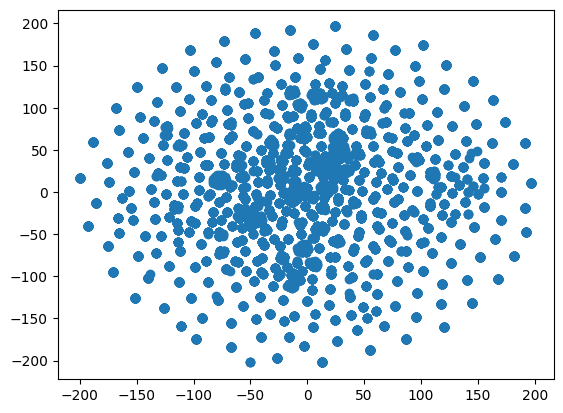

In [ ]:
# tsne = TSNE()
# d = tsne.fit_transform(ready_text)
# plt.scatter(d[:, 0], d[:, 1])
# plt.show()

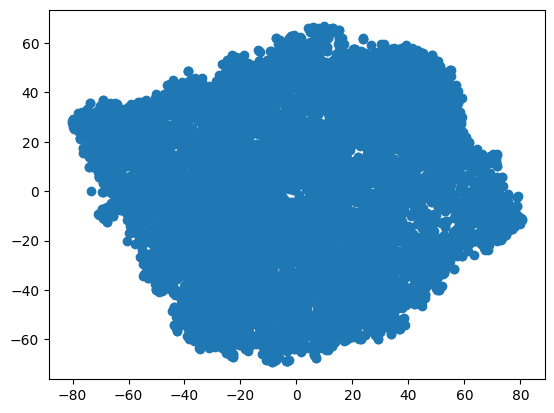

In [ ]:
# tsne = TSNE()
# d = tsne.fit_transform(ready_image)
# plt.scatter(d[:, 0], d[:, 1])
# plt.show()

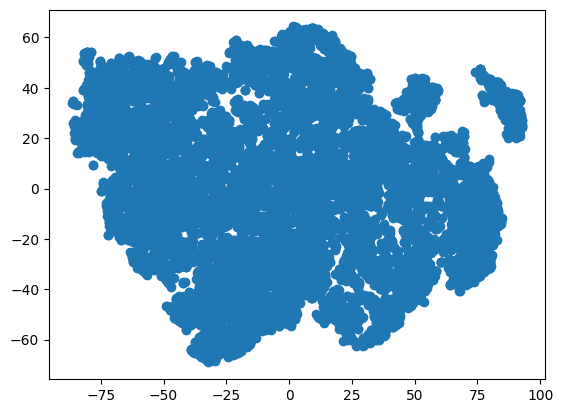

In [ ]:
# tsne = TSNE()
# d = tsne.fit_transform(ready_audio)
# plt.scatter(d[:, 0], d[:, 1])
# plt.show()

In [54]:
ready = Ready_Embeddings_Dataset( # Связывание готовых эмбов и id
    texts=t_dict,
    images=i_dict,
    audios=a_dict
)

In [55]:
m = []
compare = 'audio'
for iid, tid, aid in p1.values:
    if compare == 'image':
        m.append(F.cosine_similarity(
            ready.get_text_emb_by_id(tid),
            ready.get_image_emb_by_id(iid), dim=-1  
        ))
    else:
        m.append(F.cosine_similarity(
            ready.get_text_emb_by_id(tid),
            ready.get_audio_emb_by_id(aid), dim=-1
        ))

In [56]:
torch.tensor(m).mean()

tensor(0.9365)

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x = []
y = []
idf = p1['Images'].values
for iid, tid, aid in p1.values:
    y.append(initial.get_object_by_global_id(tid).content)
    x.append(ready.get_image_emb_by_id(iid))
y = LabelEncoder().fit_transform(y)
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y)
clf = LogisticRegression(
    max_iter=500,
    tol=1e-6,
    random_state=42,
    multi_class='multinomial',  # попробуй вместо 'ovr'
    solver='saga'  # лучше для больших данных и нормального распределения
).fit(x_train, y_train)
clf.score(x_test, y_test)

d:\conda\envs\torch\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


---- SAMPLE 1 ----
jumping into pool
--- SEARCH BY TEXT -> IMAGES ---


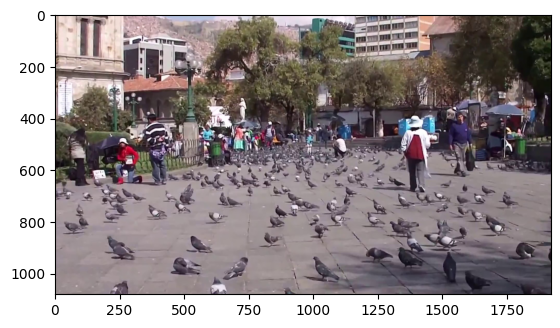

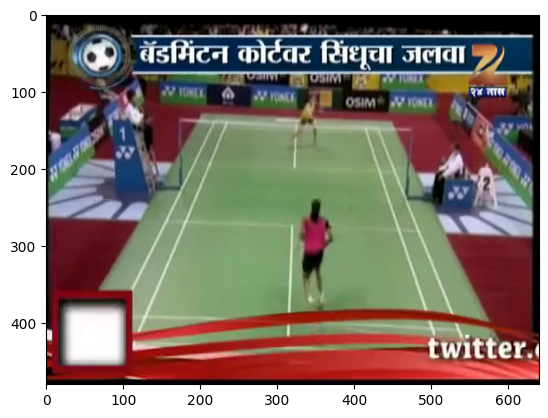

In [38]:
visual_validation(initial, ready, n_samples=1, n_neib=2, sby=TYPE_TEXT)

---- SAMPLE 1 ----


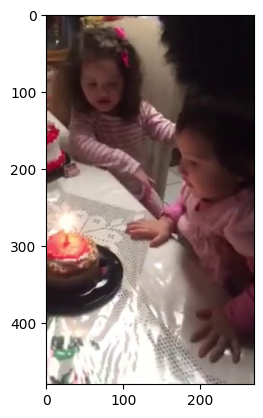

--- SEARCH BY IMAGE -> TEXTS ---
cracking neck


In [41]:
visual_validation(initial, ready, n_samples=1, n_neib=1, sby=TYPE_IMAGE)

In [ ]:
# visual_validation(initial, ready, n_samples=1, n_neib=1, sby=TYPE_AUDIO)